In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression


In [2]:
#讀取資料
df = pd.read_csv("data/training1.csv" , delim_whitespace=True, header=None) 
df.head()

,0,1,2,3,4,5,6,7
0,20170102,25.7,21.2,23.2,24.7,25.8,1,24483
1,20170103,21.6,22.2,25.5,24.7,24.2,1,28131
2,20170104,26.2,24.6,24.9,24.8,25.4,0,28485
3,20170105,25.6,22.6,26.0,25.0,26.4,0,28336
4,20170106,23.9,20.5,24.4,25.7,28.3,0,28002


In [3]:
#為特徵設定標籤
features =[
    "date",
    "TaipeiTemp",
    "TaoyuanTemp",
    "TaichungTemp",
    "TainanTemp",
    "KaohsingTemp",
    "vacation"
]

target= "peak_load(MW)"

In [4]:
#將第八欄位設定為目標，並先踢除掉，留下特徵矩陣
targets=df[7]
df.drop(columns=[7], inplace=True)
df.head()

,0,1,2,3,4,5,6
0,20170102,25.7,21.2,23.2,24.7,25.8,1
1,20170103,21.6,22.2,25.5,24.7,24.2,1
2,20170104,26.2,24.6,24.9,24.8,25.4,0
3,20170105,25.6,22.6,26.0,25.0,26.4,0
4,20170106,23.9,20.5,24.4,25.7,28.3,0


In [5]:
#放對應的特徵名稱至特徵矩陣內
df.columns=features
df.head()

,date,TaipeiTemp,TaoyuanTemp,TaichungTemp,TainanTemp,KaohsingTemp,vacation
0,20170102,25.7,21.2,23.2,24.7,25.8,1
1,20170103,21.6,22.2,25.5,24.7,24.2,1
2,20170104,26.2,24.6,24.9,24.8,25.4,0
3,20170105,25.6,22.6,26.0,25.0,26.4,0
4,20170106,23.9,20.5,24.4,25.7,28.3,0


In [6]:
#剔除掉日期，日期與特徵沒關係
df.drop(columns=["date"], inplace=True)
df.head()

,TaipeiTemp,TaoyuanTemp,TaichungTemp,TainanTemp,KaohsingTemp,vacation
0,25.7,21.2,23.2,24.7,25.8,1
1,21.6,22.2,25.5,24.7,24.2,1
2,26.2,24.6,24.9,24.8,25.4,0
3,25.6,22.6,26.0,25.0,26.4,0
4,23.9,20.5,24.4,25.7,28.3,0


In [7]:
features_vectors=df.values

In [8]:
#分離一部分資料為測試資料
X_train, X_test, Y_train, Y_test= train_test_split(features_vectors, targets ,test_size=0.1,random_state=1)

In [9]:
#使用迴歸分析，找出相關性，與訓練資料測試資料回歸分數
reg=linear_model.LinearRegression()
reg.fit(X_train, Y_train)
print("Slope:", reg.coef_[0])
print("Intercept:", reg.intercept_)
print("Socre Training: ", reg.score(X_train, Y_train))
print("Socre Testing: ", reg.score(X_test, Y_test))

Slope: -27.659547759317032
Intercept: 18316.64857593887
Socre Training:  0.8314931934847327
Socre Testing:  0.8303594944057315


In [10]:
#檢驗Ｆ，Ｐvlaues
F_values, p_values =f_regression(X_train ,Y_train)
print("F values:", F_values)
print("p values:", p_values)

F values: [628.15927399 805.36025023 438.07873785 453.64340538 483.07023849
 366.18687176]
p values: [1.08128923e-099 7.49900534e-119 4.53107946e-076 3.79187064e-078
 5.33109800e-082 4.31931056e-066]


In [11]:
#將特徵名稱與Ｆvlaues分數結合
features_and_f_values= list(zip(df.columns,F_values))
features_and_f_values

[('TaipeiTemp', 628.1592739923091),
 ('TaoyuanTemp', 805.3602502319154),
 ('TaichungTemp', 438.07873785311216),
 ('TainanTemp', 453.64340537956485),
 ('KaohsingTemp', 483.070238491956),
 ('vacation', 366.1868717593776)]

In [12]:
#得出每項特徵影響整體準確度
features_num_seq = range(1, len(features))
result_test_scores = list()
result_training_scores = list()
for num in features_num_seq:
    num_of_choosen_features = num
    selected_features = [
        feature_and_f_value[0]
        for feature_and_f_value in features_and_f_values[:num_of_choosen_features]
    ]
    
    features_vectors = df[selected_features].values
    X_train, X_test, Y_train, Y_test = train_test_split(features_vectors, targets, test_size=0.1, random_state=1)
    
    reg = linear_model.LinearRegression()
    reg.fit(X_train, Y_train)
    
    result_training_scores.append(reg.score(X_train, Y_train))
    result_test_scores.append(reg.score(X_test, Y_test))

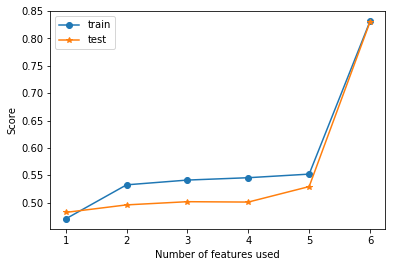

In [13]:
#出圖
plt.plot(features_num_seq, result_training_scores, marker='o', label='train')
plt.plot(features_num_seq, result_test_scores, marker='*', label='test')

plt.xticks(features_num_seq)
plt.legend()
plt.xlabel('Number of features used')
plt.ylabel('Score')
plt.show()

In [14]:
#載入預測特徵資料
df_test=pd.read_csv("data/prediction.csv", delim_whitespace=True, header=None)
df_test.head()

,0,1,2,3,4,5,6
0,20190402,20,21,25,24,25,0
1,20190403,21,22,25,26,27,0
2,20190404,23,23,24,26,27,1
3,20190405,23,23,27,27,27,1
4,20190406,25,25,28,27,27,1


In [15]:
#先將日期存在另一個column內，避免等等被drop掉讀取不到
df_test.columns=features
df_test.head()
Date=df_test["date"]
Date


0    20190402
1    20190403
2    20190404
3    20190405
4    20190406
5    20190407
6    20190408
Name: date, dtype: int64

In [16]:
#丟掉日期，因為與特徵矩陣無關
df_test.drop(columns=["date"],inplace=True)
df_test.head()

,TaipeiTemp,TaoyuanTemp,TaichungTemp,TainanTemp,KaohsingTemp,vacation
0,20,21,25,24,25,0
1,21,22,25,26,27,0
2,23,23,24,26,27,1
3,23,23,27,27,27,1
4,25,25,28,27,27,1


In [17]:
#進行預測
x=df_test.values
y_te_pred=reg.predict(x)
print(y_te_pred.shape)
print(x.shape)

(7,)
(7, 6)


In [19]:
#將預測出來的值貼上標籤
prediction = pd.DataFrame(y_te_pred, columns=["peak_load(MW)"])
prediction

,peak_load(MW)
0,29120.377125
1,30006.424873
2,26322.046475
3,25660.612372
4,26409.734375
5,26122.430857
6,30415.483159


In [20]:
#整合日期以及預測結果
result = pd.concat([ Date, prediction], axis=1)
result

,date,peak_load(MW)
0,20190402,29120.377125
1,20190403,30006.424873
2,20190404,26322.046475
3,20190405,25660.612372
4,20190406,26409.734375
5,20190407,26122.430857
6,20190408,30415.483159


In [21]:
#輸出csv檔
result.to_csv("submission.csv", index=False)